In [304]:
# Sample linear regression with current data
import pandas as pd
import os
import statsmodels.api as sm
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


%matplotlib inline
path = os.system('pwd')
df = pd.read_pickle('btc_price_5yrs.pkl',compression='bz2')

In [305]:
temp = df[0]
tmp = temp.tolist()
btc_dict = {}
prices = [float(''.join(x[1].split('$'))) for x in tmp]
dates = [x[2] for x in tmp]
btc_dict['dates'] = dates
btc_dict['prices'] = prices
btc_df = pd.DataFrame(btc_dict)
btc_df.head()
y_values = prices

In [306]:
interest = pd.read_csv('multiTimeline5yrs.csv', header=1, names=['Week','worldwide_interest'])
x_values = np.array(interest.worldwide_interest).reshape(-1,1)

In [307]:
sm.OLS(y_values,sm.add_constant(x_values)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     531.2
Date:                Thu, 12 Jul 2018   Prob (F-statistic):           1.10e-64
Time:                        17:37:27   Log-Likelihood:                -2346.3
No. Observations:                 261   AIC:                             4697.
Df Residuals:                     259   BIC:                             4704.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        475.5462    138.429      3.435      0.001     202.957     748.135
x1           220.0997      9.549     23.049      0.000     201.295     238.904
==============================================================================
Omnibus:                       88.265   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.178
Skew:                           1.248   Prob(JB):                    2.94e-103
Kurtosis:                       9.098   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
from sklearn.cross_validation import train_test_split


model= LinearRegression()
model.fit(x_values,y_values)
model.score(x_values,y_values)
# plot the model and the points
 

0.6722520787648018

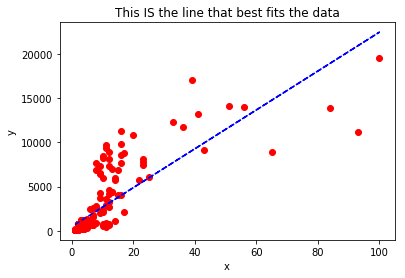

In [309]:
def plot_predict_and_points(x_values, y_values, model):
    y_predict = model.predict(x_values)

    plt.plot(x_values[:,0], y_values, 'ro')
    plt.plot(x_values[:,0], y_predict, 'b--')
    plt.xlabel('x')
    plt.ylabel('y')

plot_predict_and_points(x_values, y_values, model)
plt.title('This IS the line that best fits the data');

In [310]:
#Split the data 80-20 train/test, specific random seed
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2,random_state=42)
# using cross validation
model.fit(x_train,y_train)
model.score(X_test,y_test)

ValueError: Found input variables with inconsistent numbers of samples: [53, 11]

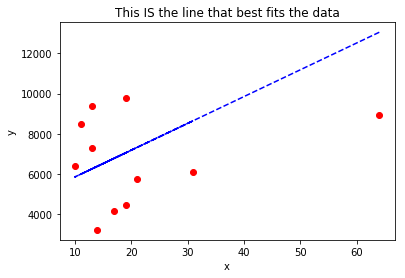

In [276]:
plot_predict_and_points(x_test, y_test, model)
plt.title('This IS the line that best fits the data');

In [277]:
# Second Feature - Nvidia graphics card 1070 price over last year

In [278]:
pixels = pd.read_csv('1070_downsampled.csv', header=1, names=['pix_x','pix_y'])
# these are approximate (make them more accurate by scraping new site)
pixel_to_price = 400/120.64
pixels_per_week = 62.75/4
pixel_date_offset = 305 # this may skew results 
down_sampled = pixels[pixels['pix_x'] > pixel_date_offset]
x = down_sampled['pix_y']*pixel_to_price




In [302]:
gtx_1070_price = x.tolist()
btc_price = x_values 
global_interest = y_values 

new_btc_df = pd.DataFrame(np.column_stack([btc_price, gtx_1070_price, global_interest]), \
                               columns=['btc_price', 'gtx_1070_price', 'global_interest'])
new_btc_df.shape

(52, 3)

In [296]:
import seaborn as sns


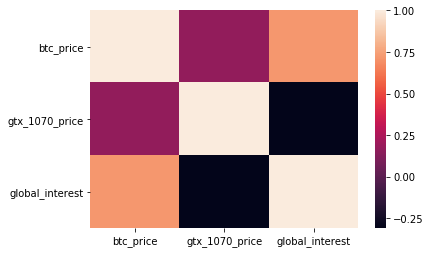

In [297]:
sns.heatmap(new_btc_df.corr())

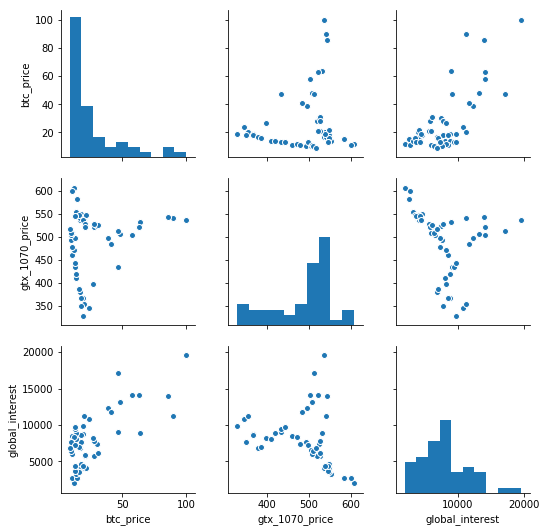

In [303]:
sns.pairplot(new_btc_df)